# WE10- RNN

### Hema Sai Ari

# Predicting the clsoing stock price of the next day

Our objective is to predict the closing stock price of next day for given x number of previous days prices. 

Our model, therefore, must accept x number of features -- each of which is the stock price, in sequence, over the past X days

To get our data, go to https://finance.yahoo.com/quote/TSLA/history?p=TSLA (which is the stock history of TESLA company) and download stock data for the 1 years. Downlown this data (it will be in csv format) and store it in your working directory (the directory this notebook is in).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

## Collect and prepare data for analysis

In [2]:
df = pd.read_csv('TSLA.csv',  parse_dates=True)

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df = df[['Close']]  #our target column

In [5]:
df

,Close
0,332.673340
1,292.140015
2,293.836670
3,292.503326
4,290.253326
...,...
245,187.039993
246,184.309998
247,180.589996
248,162.990005


In [6]:
df['Close'].isna().sum() #checking for null vlaues

0

There are no null values in the target data

In [7]:
row_count = df.shape[0] # store the number of obersvations 
row_count

250

In [8]:
temps = df.to_numpy() # to make things easier, we create a numpy array from our dataframe of prices
temps.shape

(250, 1)

In [9]:
sequence_length = 10  # here, lets create a variable to hold the number of days that will be in a sequence. This makes it easier to change later.

In [10]:
temps = temps[row_count % sequence_length: ] # Since our data may not be a multiple of sequence_length, we will ignore 
# the first number of days in order to make the total a number divisible by sequence length
#as there are 250 days which is multiple of 10 we will get the same number of observations
temps.shape

(250, 1)

In [11]:
temps = temps.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
temps

array([[332.67334 , 292.140015, 293.83667 , 292.503326, 290.253326,
        300.980011, 303.083344, 317.540009, 291.093323, 288.549988],
       [262.369995, 266.679993, 244.666672, 242.666672, 256.529999,
        241.456665, 253.869995, 236.603333, 236.473328, 221.300003],
       [224.96666 , 209.386673, 219.600006, 235.910004, 253.210007,
        252.753326, 246.789993, 258.333344, 234.516663, 238.279999],
       [238.886673, 241.866669, 239.706665, 232.229996, 215.736664,
        220.889999, 233.      , 213.100006, 216.759995, 237.036667],
       [236.08667 , 235.070007, 245.706665, 244.919998, 232.66333 ,
        228.490005, 224.473328, 227.263336, 233.066666, 231.733337],
       [244.543335, 250.763336, 234.343338, 233.070007, 237.039993,
        238.313339, 240.066666, 240.546661, 245.529999, 247.5     ],
       [271.706665, 272.243347, 268.433319, 258.859985, 274.820007,
        280.899994, 297.149994, 297.276672, 300.58667 , 307.396667],
       [308.633331, 288.170013, 290.42334

In [12]:
# we can now see that our days have been organized into rows of sequence length. 

In [13]:
# Convert to dataframe

temp_df = pd.DataFrame(temps, columns=np.arange(0,10,1))

temp_df

,0,1,2,3,4,5,6,7,8,9
0,332.673340,292.140015,293.836670,292.503326,290.253326,300.980011,303.083344,317.540009,291.093323,288.549988
1,262.369995,266.679993,244.666672,242.666672,256.529999,241.456665,253.869995,236.603333,236.473328,221.300003
2,224.966660,209.386673,219.600006,235.910004,253.210007,252.753326,246.789993,258.333344,234.516663,238.279999
3,238.886673,241.866669,239.706665,232.229996,215.736664,220.889999,233.000000,213.100006,216.759995,237.036667
4,236.086670,235.070007,245.706665,244.919998,232.663330,228.490005,224.473328,227.263336,233.066666,231.733337
5,244.543335,250.763336,234.343338,233.070007,237.039993,238.313339,240.066666,240.546661,245.529999,247.500000
6,271.706665,272.243347,268.433319,258.859985,274.820007,280.899994,297.149994,297.276672,300.586670,307.396667
7,308.633331,288.170013,290.423340,283.333344,294.356659,286.630005,300.029999,309.320007,306.563324,303.996674
8,302.869995,296.666656,289.913330,296.453339,297.096680,296.070007,288.089996,284.820007,277.700012,275.609985
9,277.160004,270.209991,274.420013,283.700012,289.260010,299.679993,304.420013,292.130005,302.609985,303.750000


# Reshape for Standardizing Data

In [14]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(temp_df).ravel().reshape(-1,1)

temp_1feature.shape

(250, 1)

In [15]:
temp_1feature

array([[332.67334 ],
       [292.140015],
       [293.83667 ],
       [292.503326],
       [290.253326],
       [300.980011],
       [303.083344],
       [317.540009],
       [291.093323],
       [288.549988],
       [262.369995],
       [266.679993],
       [244.666672],
       [242.666672],
       [256.529999],
       [241.456665],
       [253.869995],
       [236.603333],
       [236.473328],
       [221.300003],
       [224.96666 ],
       [209.386673],
       [219.600006],
       [235.910004],
       [253.210007],
       [252.753326],
       [246.789993],
       [258.333344],
       [234.516663],
       [238.279999],
       [238.886673],
       [241.866669],
       [239.706665],
       [232.229996],
       [215.736664],
       [220.889999],
       [233.      ],
       [213.100006],
       [216.759995],
       [237.036667],
       [236.08667 ],
       [235.070007],
       [245.706665],
       [244.919998],
       [232.66333 ],
       [228.490005],
       [224.473328],
       [227.2

## Standardize the values

In [16]:
# using StandardScaler to standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

## Reshape the data back to 10-day format

In [17]:
#we have 250 rows of data so we can shape them as 25 rows with 10 columns
temp_reshaped = temp_std.reshape(25,10)

temp_reshaped.shape

(25, 10)

In [18]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,2.150592,1.378198,1.410529,1.385121,1.342246,1.546651,1.586732,1.862215,1.358253,1.309787
1,0.810907,0.893038,0.473557,0.435445,0.699622,0.412387,0.648933,0.319903,0.317426,0.028286
2,0.098157,-0.198731,-0.004108,0.306691,0.636356,0.627654,0.514018,0.733986,0.280140,0.351854
3,0.363414,0.420200,0.379040,0.236566,-0.077727,0.020474,0.251239,-0.127971,-0.058227,0.328161
4,0.310058,0.290685,0.493374,0.478384,0.244824,0.165298,0.088757,0.141922,0.252509,0.227102
5,0.471206,0.589733,0.276837,0.252573,0.328224,0.352489,0.385900,0.395047,0.490008,0.527548
6,0.988825,0.999052,0.926449,0.744021,1.048152,1.164011,1.473667,1.476081,1.539156,1.668926
7,1.692491,1.302547,1.345486,1.210380,1.420438,1.273201,1.528548,1.705576,1.653046,1.604136
8,1.582666,1.464457,1.335767,1.460392,1.472651,1.453087,1.301022,1.238710,1.103033,1.063206
9,1.092742,0.960304,1.040530,1.217367,1.323317,1.521878,1.612203,1.378007,1.577712,1.599435


In [19]:
# create our X and y. 
# X will be the 9 days prior...
X = temp_reshaped[:, :-1] # all rows, all columns except the last one
# y will be the 10th day (what we are trying to predict)
y = temp_reshaped[:, -1] # all rows, only the last column

In [20]:
#splitting the data ito train and test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(17, 9, 1)
(8, 9, 1)


## Create dataframe to store results    

We are running 7 models in this notebook. We will store the results in a dataframe for easy comparison.

In [22]:
df_results = pd.DataFrame({'model': [], 'mean_squared_error': []})

## Pre defining the values which we use in all models

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D

n_steps = sequence_length - 1
n_inputs = 1
monitor='val_root_mean_squared_error'
activation=None
loss="mean_squared_error"
metrics=[tf.keras.metrics.RootMeanSquaredError()]



## Simple RNN


In [24]:
model = Sequential(
    [
        SimpleRNN(10, input_shape=[n_steps, n_inputs]),
        Dense(1, activation=activation)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [25]:

model.compile(
    loss=loss, 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6934 - root_mean_squared_error: 0.8327 - val_loss: 0.6837 - val_root_mean_squared_error: 0.8269
Epoch 2/50
1/1 [==============================] - 0s 59ms/step - loss: 0.6699 - root_mean_squared_error: 0.8185 - val_loss: 0.6702 - val_root_mean_squared_error: 0.8187
Epoch 3/50
1/1 [==============================] - 0s 61ms/step - loss: 0.6530 - root_mean_squared_error: 0.8081 - val_loss: 0.6578 - val_root_mean_squared_error: 0.8111
Epoch 4/50
1/1 [==============================] - 0s 136ms/step - loss: 0.6374 - root_mean_squared_error: 0.7984 - val_loss: 0.6455 - val_root_mean_squared_error: 0.8035
Epoch 5/50
1/1 [==============================] - 0s 100ms/step - loss: 0.6222 - root_mean_squared_error: 0.7888 - val_loss: 0.6332 - val_root_mean_squared_error: 0.7957
Epoch 6/50
1/1 [==============================] - 0s 90ms/step - loss: 0.6069 - root_mean_squared_error: 0.7791 - val_loss: 0.6206 - val_root_mean_squared_

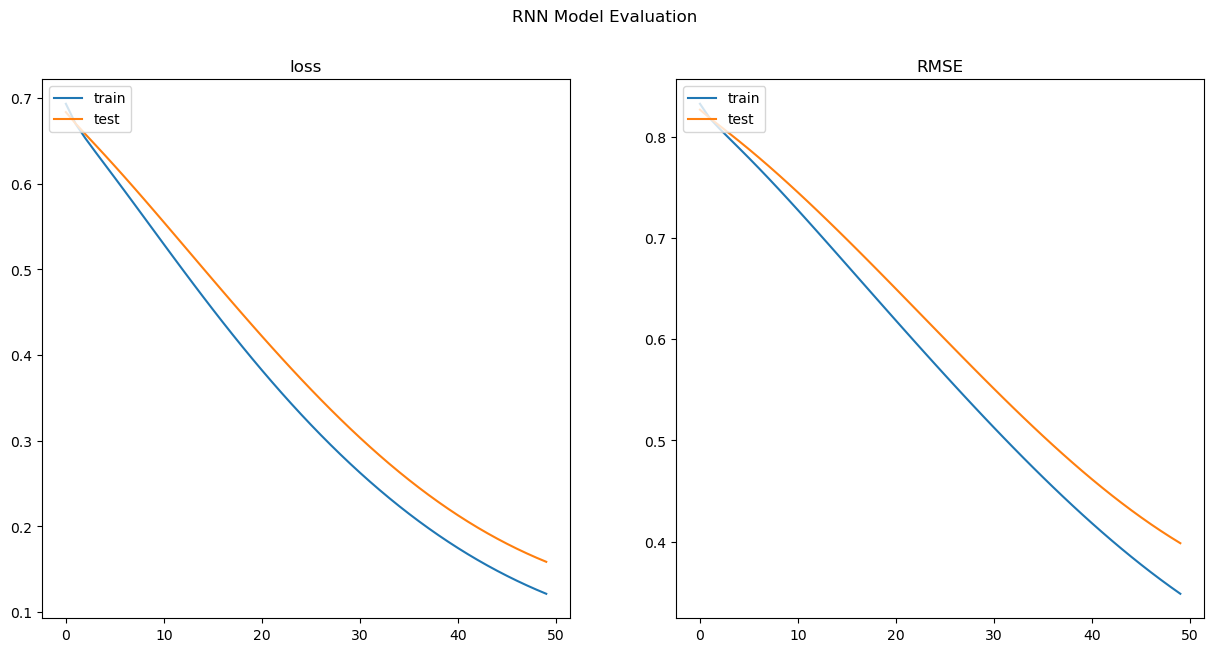

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

We can clearlly observe that the model fitting is improving in both train and test set. And there is very wide gap between the train and test set which indicates that we are over fitting the train data and we can see that its not performing soo weel in the test data

### Predictions

In [28]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)



1/1 [==============================] - 0s 245ms/step


In [29]:
#lets create a data frame which will shows us the actual and the predicted values 
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [30]:
comparison

,actual,predicted
0,182.860001,185.046310
1,190.720001,190.770554
2,118.849998,164.199432
3,237.036667,225.524002
4,172.919998,192.082916
5,268.209991,274.037201
6,144.429993,173.727188
7,201.289993,194.740570


In [31]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(comparison['actual'], comparison['predicted'])
mse

437.03619374189975

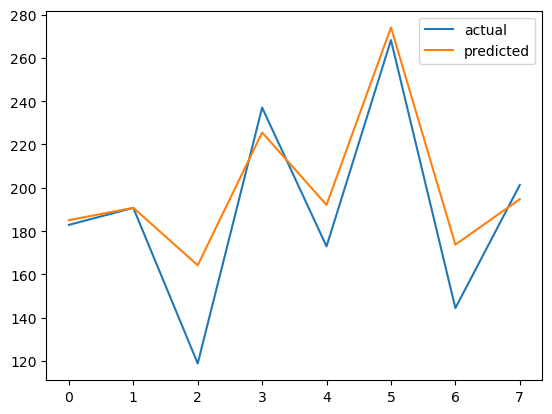

In [32]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

Here we can clearly observe the actuall and the predicted closing day stock price. RNN is predicting the stock price almost perfectly

In [33]:
df_result = pd.DataFrame(
    {
        'model': ['RNN'], 
        'mean_squared_error': mse
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# Deep RNN

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training.**

**Since the last layer is DENSE, it can't take sequence data. Therefore, you CANNOT return sequences from the previous layer. So, remove** `return_sequences` **from previous layer.**

In [34]:
n_steps = sequence_length - 1
n_inputs = 1


model = keras.models.Sequential(
    [
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[n_steps, n_inputs]),
        keras.layers.SimpleRNN(10, return_sequences=True),
        keras.layers.SimpleRNN(20, return_sequences=False), 
        keras.layers.Dense(1, activation=activation)
    ]
)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    loss=loss, 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)

In [36]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta=0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data = (X_test, y_test), 
    callbacks=[early_stop]
)  

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.4675 - root_mean_squared_error: 0.6072 - val_loss: 0.3760 - val_root_mean_squared_error: 0.6132
Epoch 2/50
1/1 [==============================] - 0s 68ms/step - loss: 0.3702 - root_mean_squared_error: 0.6085 - val_loss: 0.3240 - val_root_mean_squared_error: 0.5692
Epoch 3/50
1/1 [==============================] - 0s 69ms/step - loss: 0.3179 - root_mean_squared_error: 0.5639 - val_loss: 0.2884 - val_root_mean_squared_error: 0.5370
Epoch 4/50
1/1 [==============================] - 0s 71ms/step - loss: 0.2779 - root_mean_squared_error: 0.5271 - val_loss: 0.2632 - val_root_mean_squared_error: 0.5130
Epoch 5/50
1/1 [==============================] - 0s 67ms/step - loss: 0.2443 - root_mean_squared_error: 0.4943 - val_loss: 0.2459 - val_root_mean_squared_error: 0.4959
Epoch 6/50
1/1 [==============================] - 0s 66ms/step - loss: 0.2153 - root_mean_squared_error: 0.4640 - val_loss: 0.2350 - val_root_mean_squared_er

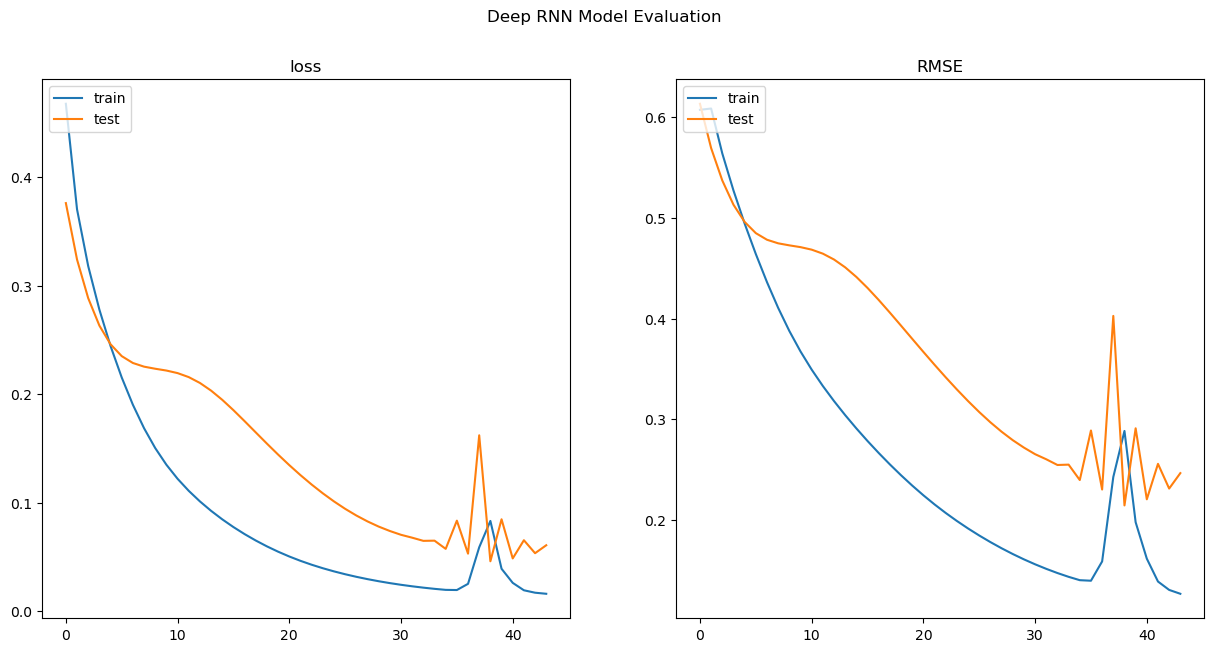

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

We can clearlly observe that the loss is improving in both training and test but in RSME the test set is not improving as much as the train which can also tell us that it is overfitting the train data

### Predictions

In [38]:
#Predict:
y_pred = model.predict(X_test)


1/1 [==============================] - 0s 449ms/step


In [39]:


comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [40]:
comparison

,actual,predicted
0,182.860001,153.932999
1,190.720001,192.680206
2,118.849998,122.475105
3,237.036667,220.585480
4,172.919998,172.109451
5,268.209991,277.895569
6,144.429993,133.629898
7,201.289993,199.451324


In [41]:
mse_2=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_2

167.36087390417953

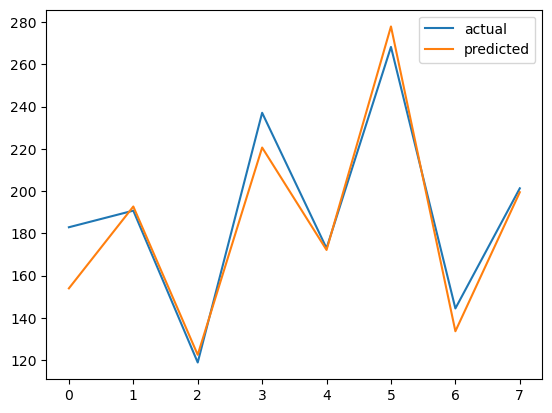

In [42]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [43]:
df_result = pd.DataFrame(
    {
        'model': ['Deep RNN'], 
        'mean_squared_error': mse_2
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# LSTM with one layer

In [44]:


model = keras.models.Sequential(
    [
        keras.layers.LSTM(10, input_shape=[n_steps, n_inputs]),
        keras.layers.Dense(1, activation=activation)
    ]
)

In [45]:
model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


### Calculate the number of paramaters for the model

In [46]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
) 

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.6328 - root_mean_squared_error: 1.0629 - val_loss: 1.7608 - val_root_mean_squared_error: 1.3269
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 1.6161 - root_mean_squared_error: 1.2713 - val_loss: 1.7515 - val_root_mean_squared_error: 1.3234
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 1.6039 - root_mean_squared_error: 1.2664 - val_loss: 1.7429 - val_root_mean_squared_error: 1.3202
Epoch 4/50
1/1 [==============================] - 0s 40ms/step - loss: 1.5925 - root_mean_squared_error: 1.2620 - val_loss: 1.7343 - val_root_mean_squared_error: 1.3169
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 1.5814 - root_mean_squared_error: 1.2575 - val_loss: 1.7256 - val_root_mean_squared_error: 1.3136
Epoch 6/50
1/1 [==============================] - 0s 43ms/step - loss: 1.5701 - root_mean_squared_error: 1.2530 - val_loss: 1.7166 - val_root_mean_squared_er

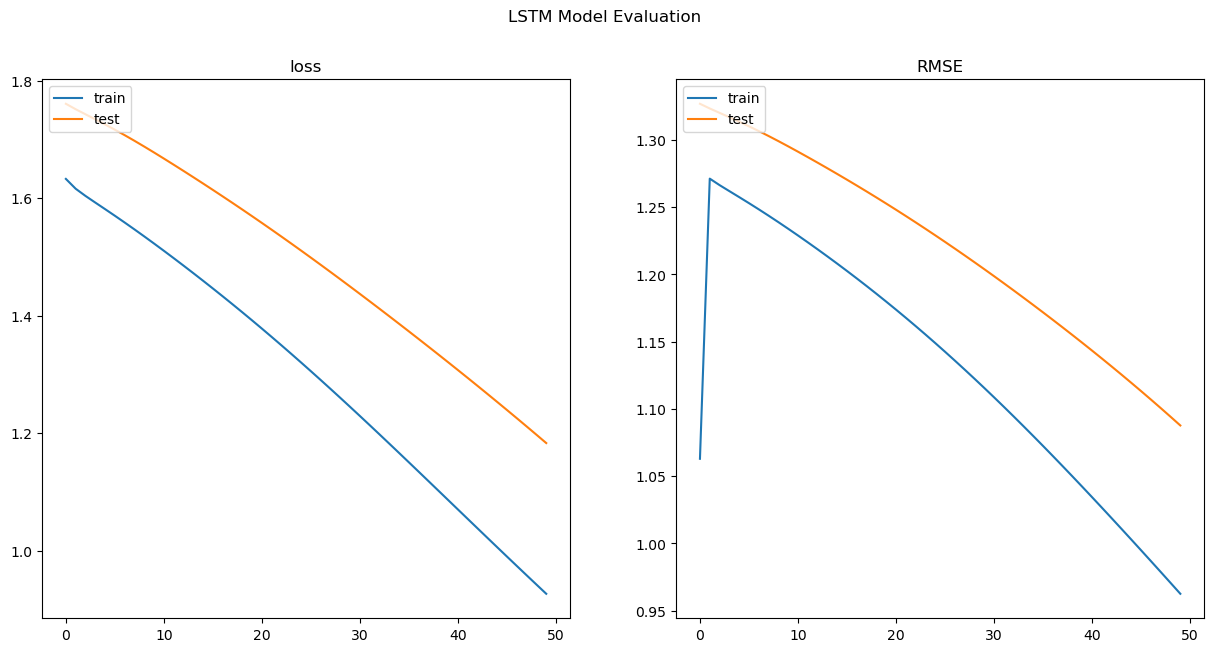

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('LSTM Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

Both train and test data are improving very well in this model

### Predictions

In [48]:
#Predict:
y_pred = model.predict(X_test)


1/1 [==============================] - 1s 593ms/step


In [49]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [50]:
mse_3=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_3

3257.9879682751916

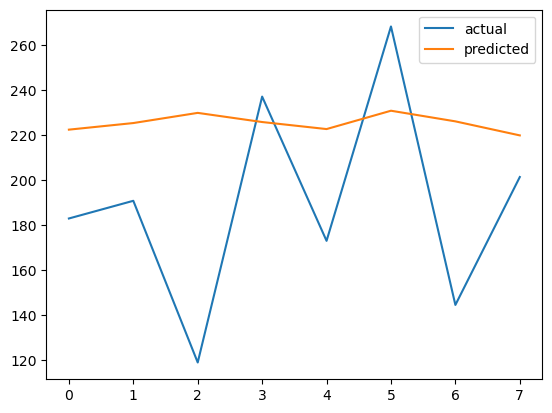

In [51]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

though there is more improvment in the train and test data the prdiction is not soo great in this model as we can see that the mean square error is 1535.5 which is higher that the previous models

In [52]:
df_result = pd.DataFrame(
    {
        'model': ['LSTM with one layer'], 
        'mean_squared_error': mse_3
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# LSTM with more layers

In [53]:


model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.LSTM(20),
    keras.layers.Dense(1, activation=activation)
])

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    metrics=metrics
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 9, 20)             1760      
                                                                 
 lstm_2 (LSTM)               (None, 9, 20)             3280      
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


### Calculate the number of paramaters for the model

In [55]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 14s 14s/step - loss: 1.0407 - root_mean_squared_error: 1.0422 - val_loss: 1.0781 - val_root_mean_squared_error: 1.0383
Epoch 2/50
1/1 [==============================] - 0s 88ms/step - loss: 1.0038 - root_mean_squared_error: 1.0019 - val_loss: 1.0604 - val_root_mean_squared_error: 1.0298
Epoch 3/50
1/1 [==============================] - 0s 89ms/step - loss: 0.9776 - root_mean_squared_error: 0.9887 - val_loss: 1.0440 - val_root_mean_squared_error: 1.0217
Epoch 4/50
1/1 [==============================] - 0s 86ms/step - loss: 0.9534 - root_mean_squared_error: 0.9764 - val_loss: 1.0275 - val_root_mean_squared_error: 1.0137
Epoch 5/50
1/1 [==============================] - 0s 79ms/step - loss: 0.9295 - root_mean_squared_error: 0.9641 - val_loss: 1.0107 - val_root_mean_squared_error: 1.0053
Epoch 6/50
1/1 [==============================] - 0s 75ms/step - loss: 0.9052 - root_mean_squared_error: 0.9514 - val_loss: 0.9933 - val_root_mean_squared_

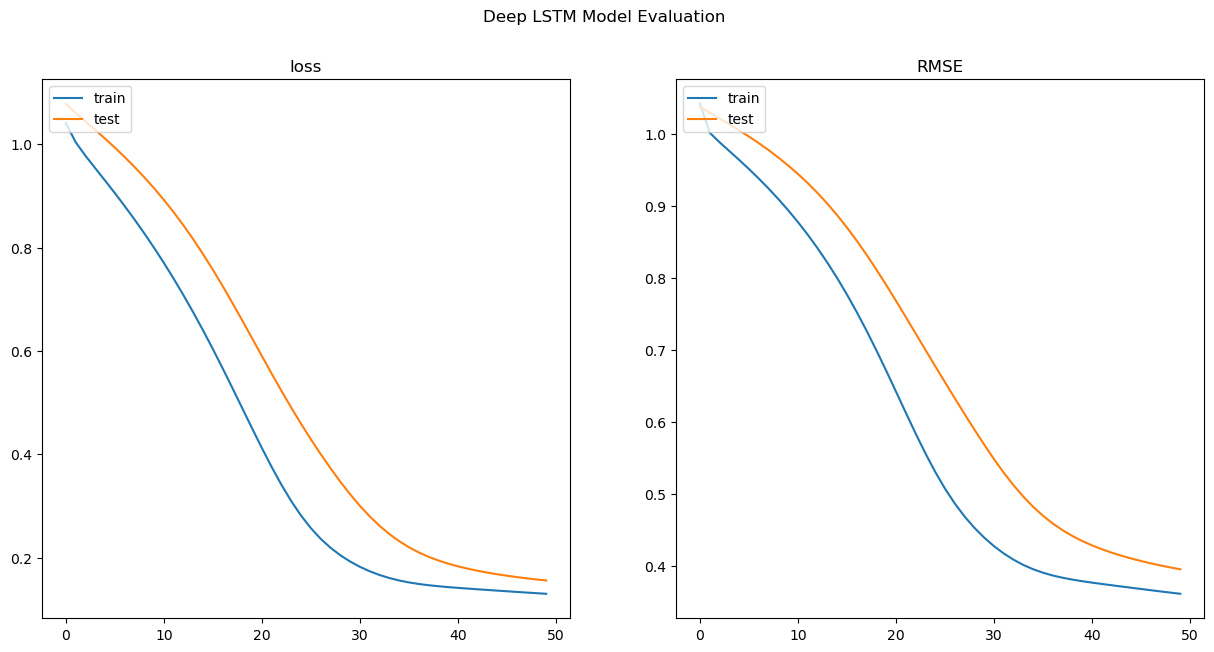

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep LSTM Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

We can clearlly observe thatthe train and test data are imporving very weel n this model and the test data almost improved as much as train data at 50 epochs. But the train data seems to stop improving after 50 epochs

### Predictions

In [57]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [58]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [59]:
mse_4=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_4

429.16570605681306

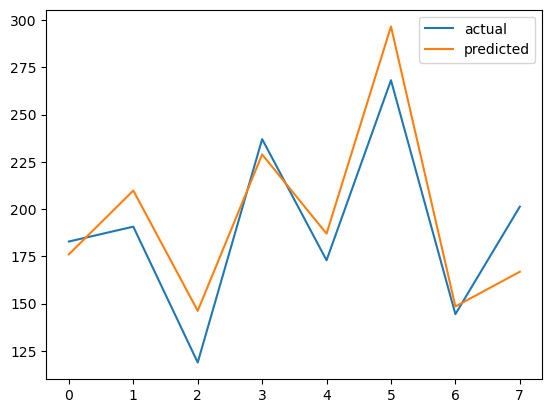

In [60]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

Deep LSTM model is good at prdicting the closing stock price of the 10th day

In [61]:
df_result = pd.DataFrame(
    {
        'model': ['Deep LSTM '], 
        'mean_squared_error': mse_4
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# GRU with one layer

In [62]:

model = keras.models.Sequential([
    keras.layers.GRU(15, input_shape=[n_steps, n_inputs]),
    keras.layers.Dense(1, activation=activation)
])

In [63]:
model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15)                810       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


### Calculate the number of paramaters for the model

In [64]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.8440 - root_mean_squared_error: 1.1418 - val_loss: 2.0236 - val_root_mean_squared_error: 1.4225
Epoch 2/50
1/1 [==============================] - 0s 68ms/step - loss: 1.8067 - root_mean_squared_error: 1.3441 - val_loss: 2.0063 - val_root_mean_squared_error: 1.4165
Epoch 3/50
1/1 [==============================] - 0s 68ms/step - loss: 1.7794 - root_mean_squared_error: 1.3340 - val_loss: 1.9903 - val_root_mean_squared_error: 1.4108
Epoch 4/50
1/1 [==============================] - 0s 65ms/step - loss: 1.7543 - root_mean_squared_error: 1.3245 - val_loss: 1.9744 - val_root_mean_squared_error: 1.4051
Epoch 5/50
1/1 [==============================] - 0s 69ms/step - loss: 1.7293 - root_mean_squared_error: 1.3150 - val_loss: 1.9581 - val_root_mean_squared_error: 1.3993
Epoch 6/50
1/1 [==============================] - 0s 64ms/step - loss: 1.7042 - root_mean_squared_error: 1.3054 - val_loss: 1.9414 - val_root_mean_squared_er

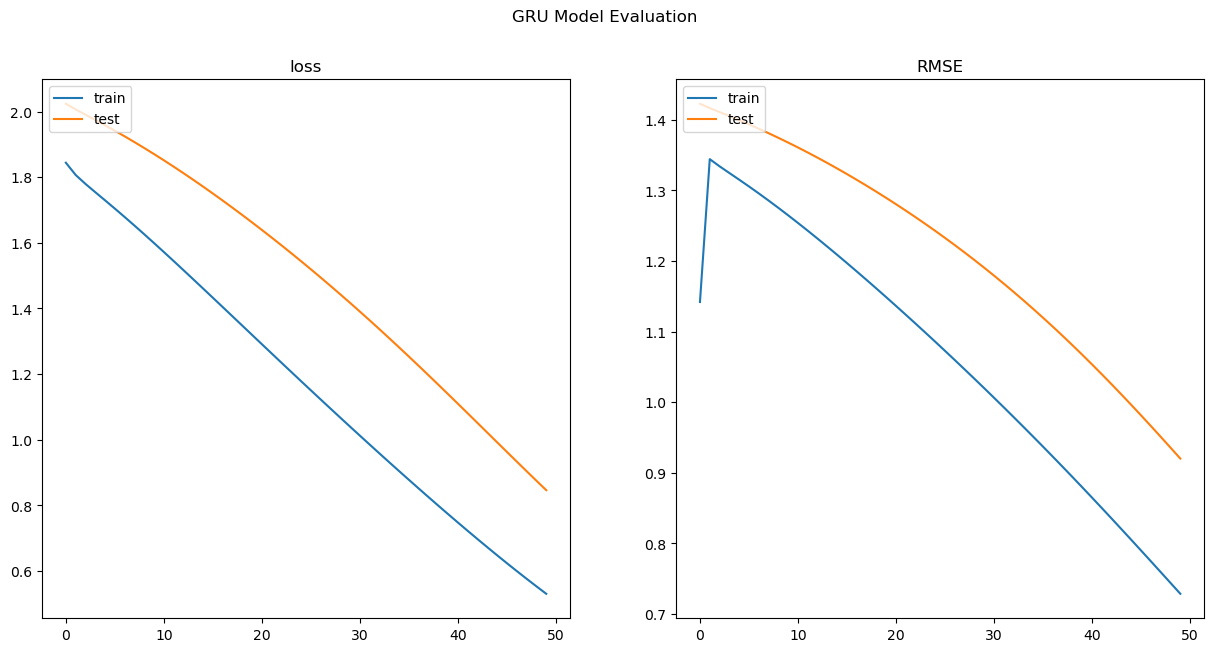

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('GRU Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

Both trainng and test set are improving weel in ths model. If we observe the rsme the value of test data increased a little in the middle before it starts improving again

### Predictions

In [66]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 522ms/step


In [67]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [68]:
mse_5=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_5

2331.347546459012

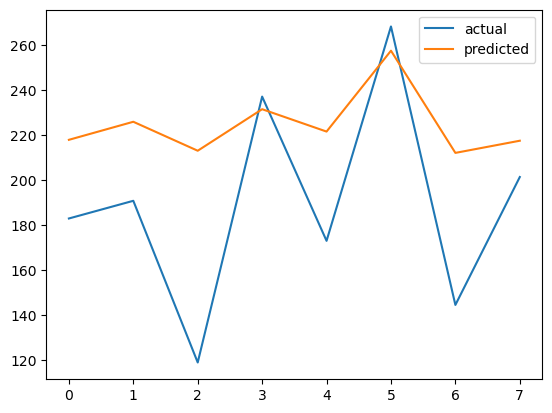

In [69]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

GRU with single layer is not soo good in predicting the closing stock price of the 10th day but better than LSTM with single layer

In [70]:
df_result = pd.DataFrame(
    {
        'model': ['Gru with one layer'], 
        'mean_squared_error': mse_5
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# GRU with more layers

In [71]:


model = keras.models.Sequential([
    keras.layers.GRU(10, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.GRU(10, return_sequences=True),
    keras.layers.GRU(10),
    keras.layers.Dense(1, activation=activation)
])

In [72]:
model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 9, 10)             390       
                                                                 
 gru_2 (GRU)                 (None, 9, 10)             660       
                                                                 
 gru_3 (GRU)                 (None, 10)                660       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


### Calculate the number of paramaters for the model

In [73]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 12s 12s/step - loss: 1.1192 - root_mean_squared_error: 1.0158 - val_loss: 1.1687 - val_root_mean_squared_error: 1.0810
Epoch 2/50
1/1 [==============================] - 0s 80ms/step - loss: 1.0743 - root_mean_squared_error: 1.0365 - val_loss: 1.1498 - val_root_mean_squared_error: 1.0723
Epoch 3/50
1/1 [==============================] - 0s 78ms/step - loss: 1.0427 - root_mean_squared_error: 1.0211 - val_loss: 1.1324 - val_root_mean_squared_error: 1.0641
Epoch 4/50
1/1 [==============================] - 0s 79ms/step - loss: 1.0141 - root_mean_squared_error: 1.0070 - val_loss: 1.1150 - val_root_mean_squared_error: 1.0559
Epoch 5/50
1/1 [==============================] - 0s 78ms/step - loss: 0.9865 - root_mean_squared_error: 0.9932 - val_loss: 1.0972 - val_root_mean_squared_error: 1.0475
Epoch 6/50
1/1 [==============================] - 0s 78ms/step - loss: 0.9592 - root_mean_squared_error: 0.9794 - val_loss: 1.0788 - val_root_mean_squared_

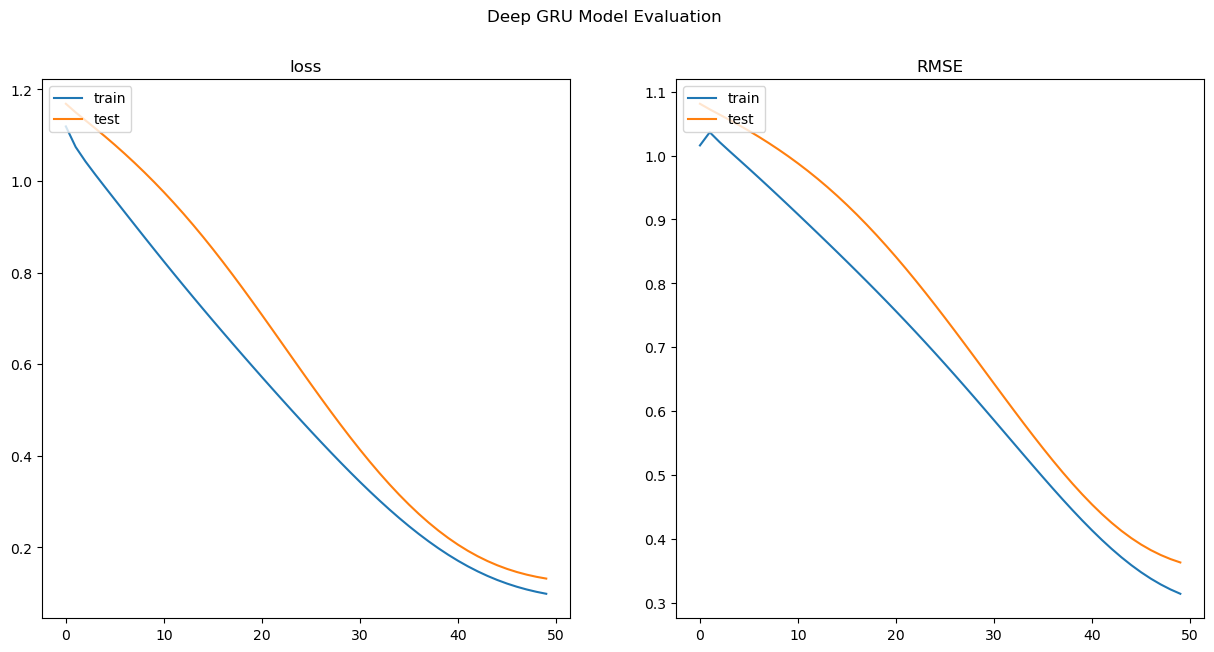

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep GRU Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

We can see a slight increase of loss and RSME of the test data intially but later if improve much better as it almost can close to the test data at 50 epoch and also we can observe that it is increasing again 

### Predictions

In [75]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [76]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [77]:
mse_6=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_6

362.70448099095415

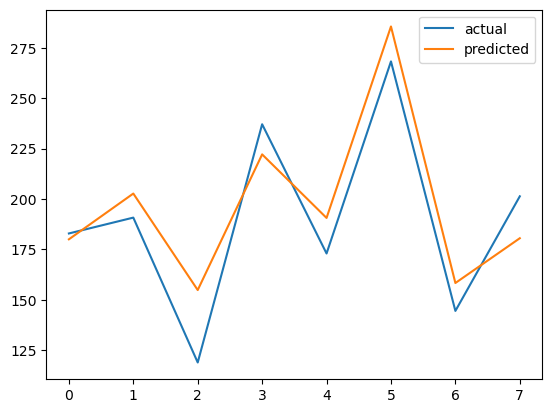

In [78]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

Deep GRU is predicting the closing stock price better than many model and have only 300 mean square error value

In [79]:
df_result = pd.DataFrame(
    {
        'model': ['Deep GRU'], 
        'mean_squared_error': mse_6
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# Conv1D

In [80]:


model = keras.models.Sequential([
    keras.layers.Conv1D(filters=10, kernel_size=3, strides=1, padding="valid", input_shape=[n_steps, n_inputs]),
    keras.layers.Conv1D(filters=15, kernel_size=3, strides=1, padding="valid"),
    keras.layers.LSTM(10, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation=activation)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 10)             40        
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 15)             465       
                                                                 
 lstm_4 (LSTM)               (None, 5, 10)             1040      
                                                                 
 lstm_5 (LSTM)               (None, 32)                5504      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,082
Trainable params: 7,082
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.010), 
    metrics=metrics
)

In [82]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop] 
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 1.0901 - root_mean_squared_error: 0.8851 - val_loss: 0.9100 - val_root_mean_squared_error: 0.9539
Epoch 2/50
1/1 [==============================] - 0s 113ms/step - loss: 0.7674 - root_mean_squared_error: 0.8760 - val_loss: 0.7278 - val_root_mean_squared_error: 0.8531
Epoch 3/50
1/1 [==============================] - 0s 111ms/step - loss: 0.5030 - root_mean_squared_error: 0.7092 - val_loss: 0.5438 - val_root_mean_squared_error: 0.7374
Epoch 4/50
1/1 [==============================] - 0s 80ms/step - loss: 0.2848 - root_mean_squared_error: 0.5337 - val_loss: 0.3639 - val_root_mean_squared_error: 0.6032
Epoch 5/50
1/1 [==============================] - 0s 115ms/step - loss: 0.1888 - root_mean_squared_error: 0.4345 - val_loss: 0.1991 - val_root_mean_squared_error: 0.4462
Epoch 6/50
1/1 [==============================] - 0s 107ms/step - loss: 0.1400 - root_mean_squared_error: 0.3741 - val_loss: 0.2088 - val_root_mean_squa

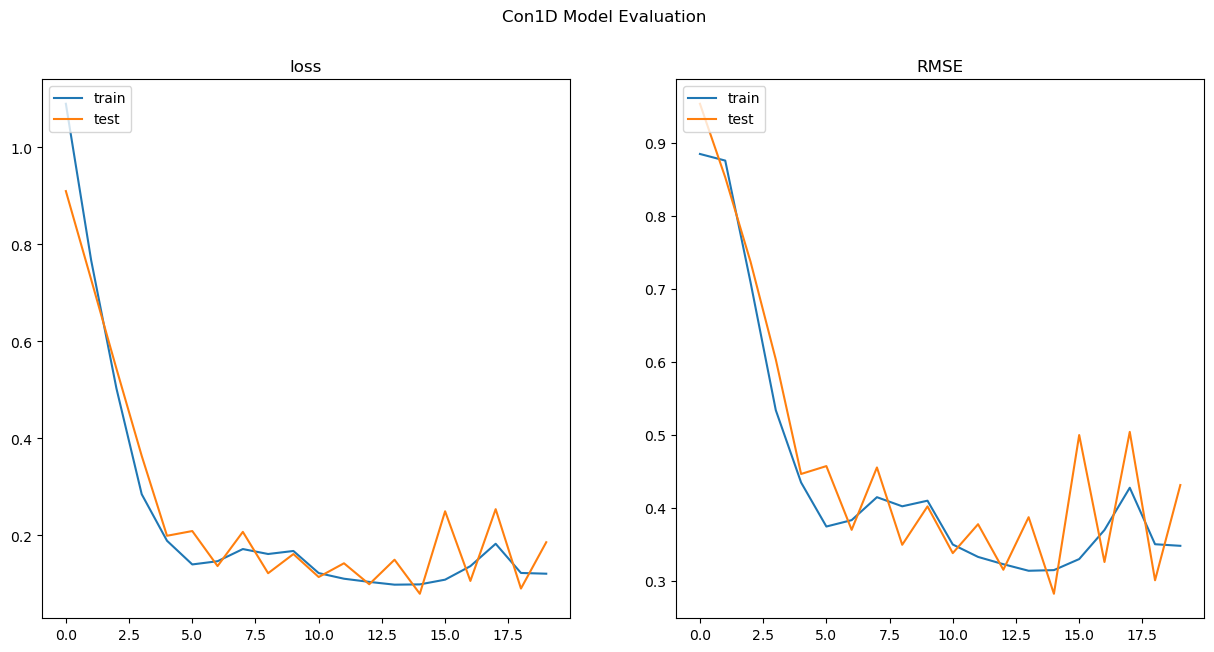

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Con1D Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

We can observe that the test data is acting weird in this model fittig as its improving and again increasing.

### Predictions

In [84]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [85]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [86]:
mse_7=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_7

511.63594482014054

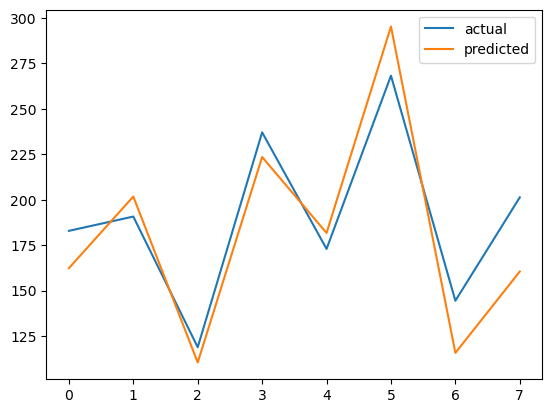

In [87]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

Although the loss fuction and the RSME values of model fitting are weird, CONV1D prediction are much better than LSTM iwth single layer and GRU with single layer

In [88]:
df_result = pd.DataFrame(
    {
        'model': ['CONV1D'], 
        'mean_squared_error': mse_7
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

## Conclusion

In [89]:
df_results.sort_values(by=['mean_squared_error'], ascending=True)

,model,mean_squared_error
1,Deep RNN,167.360874
5,Deep GRU,362.704481
3,Deep LSTM,429.165706
0,RNN,437.036194
6,CONV1D,511.635945
4,Gru with one layer,2331.347546
2,LSTM with one layer,3257.987968


We can clearlly see that the Deep RNN(Recuring Neural Network with many layers) is performing and predicting the closing stock price of the 10th day very well when compared to other models. So, the best model fitting and predicting the stock price from the 9 day's stock price is **Deep Recurring Neural Networks**